<a href="https://colab.research.google.com/github/nupoor-ka/ES114-PSDV/blob/main/Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTING RELEVANT LIBRARIES AND DATA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [ ]:
data = sns.load_dataset(name = 'iris')

#CREATING A COVARIANCE MATRIX

In [ ]:
sep_len = np.array(data['sepal_length'])
sep_wid = np.array(data['sepal_width'])
pet_len = np.array(data['petal_length'])
pet_wid = np.array(data['petal_width'])
data_l = [sep_len, sep_wid, pet_len, pet_wid]

The covariance of two variables is a number that indicates the type of linear relationship between the two variables. A positive covariance indicates a positive linear dependence between the variables, a negative covariance indicates a negative linear dependence between the variables and the covariance being equal to zero indicates no linear dependence between the variables.

$cov(X, Y) = E[(X-E[X])(Y - E[Y])]$
$\therefore cov(X, Y) = E[XY-E[X]Y - E[Y]X + E[X]E[Y]]$
$\therefore cov(X, Y) = E[(XY-E[X]E[Y] - E[Y]E[X] + E[X]E[Y])]$
$\therefore cov(X, Y) = E[(XY-E[X]E[Y])]$
$\therefore cov(X, Y) = E[XY]-E[X]E[Y]$

Here, E[X] is the expectation of X, the mean of all values of X.

$E[X] = \frac {\displaystyle{\sum_{i=1}^{n} x_i}}{n}$

In [ ]:
def expec(x):
  e = np.sum(x)/len(x)
  return e

In [ ]:
def cov(x, y):
  xy = x*y
  cov = expec(xy) - expec(x)*expec(y)
  return cov

A covariance matrix is a square matrix of the order of the number of given variables. Its entries are the covariances of the variables, taken two at a time.

In [ ]:
ls = []
ll = ['sl', 'sw', 'pl', 'pw']
for i in range(4):
  l = []
  for j in range(4):
    l.append(cov(data_l[i],data_l[j]))
  ls.append(l)

In [ ]:
columns = np.array(data.columns)[0:4]
index = np.array(data.columns)[0:4]

In [ ]:
cov_mat = pd.DataFrame(ls, index, columns)
display(cov_mat)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.681122,-0.042151,1.265820,0.512829
sepal_width,-0.042151,0.188713,-0.327459,-0.120828
petal_length,1.265820,-0.327459,3.095503,1.286972
petal_width,0.512829,-0.120828,1.286972,0.577133


#FINDING PRINCIPAL COMPONENTS

###FUNCTIONS TO CALCULATE VARIANCE AND STANDARD DEVIATION

The variance of a variable X,

$\sigma^2= E[X^2]-(E[X])^2$

This is also equal to the covariance of a variable with itself.

In [ ]:
def va(x):
  return cov(x, x)

In [ ]:
def sta(x):
  return math.sqrt(va(x))

###STANDARDISING DATA

In [ ]:
std_data = []
for i in data_l:
  std_data.append((i-expec(i))/sta(i))

###COVARIANCE MATRIX OF STANDARDISED DATA

In [ ]:
std_l = []
for i in std_data:
  l = []
  for j in std_data:
    l.append(cov(i, j))
  std_l.append(l)
col = ['std_sl', 'std_sw', 'std_pl', 'std_pw']
std_cov_mat = pd.DataFrame(std_l, col, col)

In [ ]:
display(std_cov_mat)

,std_sl,std_sw,std_pl,std_pw
std_sl,1.000000,-0.117570,0.871754,0.817941
std_sw,-0.117570,1.000000,-0.428440,-0.366126
std_pl,0.871754,-0.428440,1.000000,0.962865
std_pw,0.817941,-0.366126,0.962865,1.000000


###FINDING EIGENVALUES AND EIGENVECTORS FOR PRINCIPAL COMPONENTS

The principal component of a set of data is a line that best fits the data and represents the direction along which the variance of the data is maximal. A unit vector along this line is called the singular vector or eigenvector of that principal component.

In [ ]:
eigvals, eigvecs = np.linalg.eig(std_cov_mat)
print('Principal Components:')
print()
print('1:','Vector =', eigvecs[0],', Magnitude =', eigvals[0])
print('2:','Vector =', eigvecs[1],', Magnitude =', eigvals[1])
print('3:','Vector =', eigvecs[2],', Magnitude =', eigvals[2])
print('4:','Vector =', eigvecs[3],', Magnitude =', eigvals[3])

Principal Components:

1: Vector = [ 0.52106591 -0.37741762 -0.71956635  0.26128628] , Magnitude = 2.918497816532
2: Vector = [-0.26934744 -0.92329566  0.24438178 -0.12350962] , Magnitude = 0.914030471468072
3: Vector = [ 0.5804131  -0.02449161  0.14212637 -0.80144925] , Magnitude = 0.14675687557131584
4: Vector = [ 0.56485654 -0.06694199  0.63427274  0.52359713] , Magnitude = 0.02071483642861939


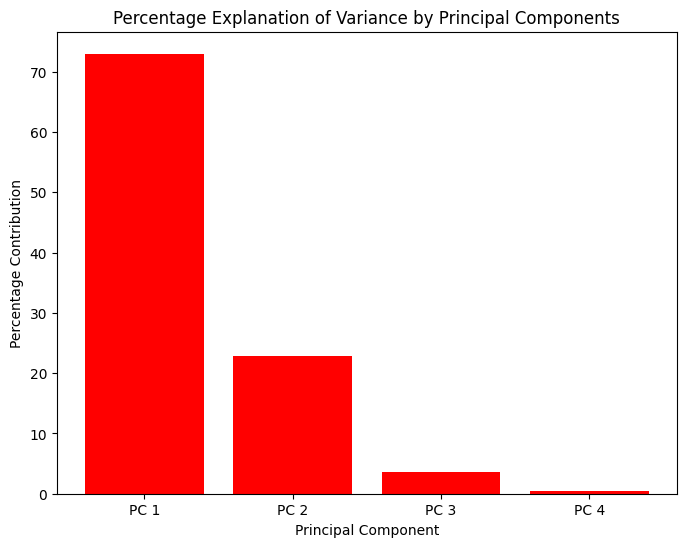

In [ ]:
ev = np.array(eigvals)
percs = (ev/(np.sum(ev)))*100
plt.figure(figsize=(8, 6))
plt.bar(['PC 1', 'PC 2', 'PC 3', 'PC 4'], percs, color = 'r')
plt.xlabel('Principal Component')
plt.ylabel('Percentage Contribution')
plt.title('Percentage Explanation of Variance by Principal Components')
plt.show()

#DIMENSIONALITY REDUCTION WITH PLOTS

To reduce the data to three dimensions, we choose the three principal components that describe the most variance in the data. In this case, the principal components with eigenvalues 2.91849782, 0.91403047 and  0.14675688 are the most descriptive and thus they are chosen as together they describe 99.48% of the variance in the data. In a similar way, the data can also be reduced to two dimensions, choosing the two principal components with eigenvalues 2.91849782 and 0.91403047 are chosen as together they describe 95.81% of the variance in the data.

In [ ]:
d2 = eigvals[:2]
d3 = eigvals[:3]
v2 = eigvecs[:, :2]
v3 = eigvecs[:, :3]
d_2 = np.dot(data[columns], v2)
d_3 = np.dot(data[columns], v3)

In [ ]:
print('Two-dimensional dataset:')
df2 = pd.DataFrame(d_2, columns = ['PC 1', 'PC 2'])
display(df2)

Two-dimensional dataset:


,PC 1,PC 2
0,2.640270,-5.204041
1,2.670730,-4.666910
2,2.454606,-4.773636
3,2.545517,-4.648463
4,2.561228,-5.258629
...,...,...
145,7.000417,-5.579908
146,6.584640,-4.935618
147,6.726747,-5.484342
148,6.748228,-5.765416


In [ ]:
print('Three-dimensional dataset:')
df3 = pd.DataFrame(d_3, columns = ['PC 1', 'PC 2', 'PC 3'])
display(df3)

Three-dimensional dataset:


,PC 1,PC 2,PC 3
0,2.640270,-5.204041,-2.488621
1,2.670730,-4.666910,-2.466898
2,2.454606,-4.773636,-2.288321
3,2.545517,-4.648463,-2.212378
4,2.561228,-5.258629,-2.392226
...,...,...,...
145,7.000417,-5.579908,-1.890065
146,6.584640,-4.935618,-2.006564
147,6.726747,-5.484342,-1.936433
148,6.748228,-5.765416,-1.404104


##CREATING A 2D PLOT

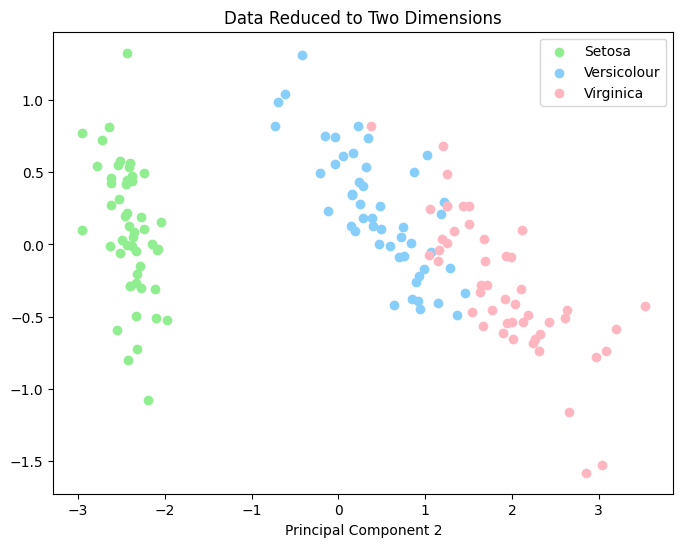

In [ ]:
df2 = df2 - df2.mean()
setosa = df2[:50]
versicolor = df2[51:100]
virginica = df2[101:150]
plt.figure(figsize=(8, 6))
plt.scatter(setosa['PC 1'], setosa['PC 2'], color = 'lightgreen')
plt.scatter(versicolor['PC 1'], versicolor['PC 2'], color = 'lightskyblue')
plt.scatter(virginica['PC 1'], virginica['PC 2'], color = 'lightpink')
plt.legend(['Setosa', 'Versicolour', 'Virginica'])
plt.xlabel('Principal Component 1')
plt.xlabel('Principal Component 2')
plt.title('Data Reduced to Two Dimensions')
plt.show()

##CREATING A 3D PLOT

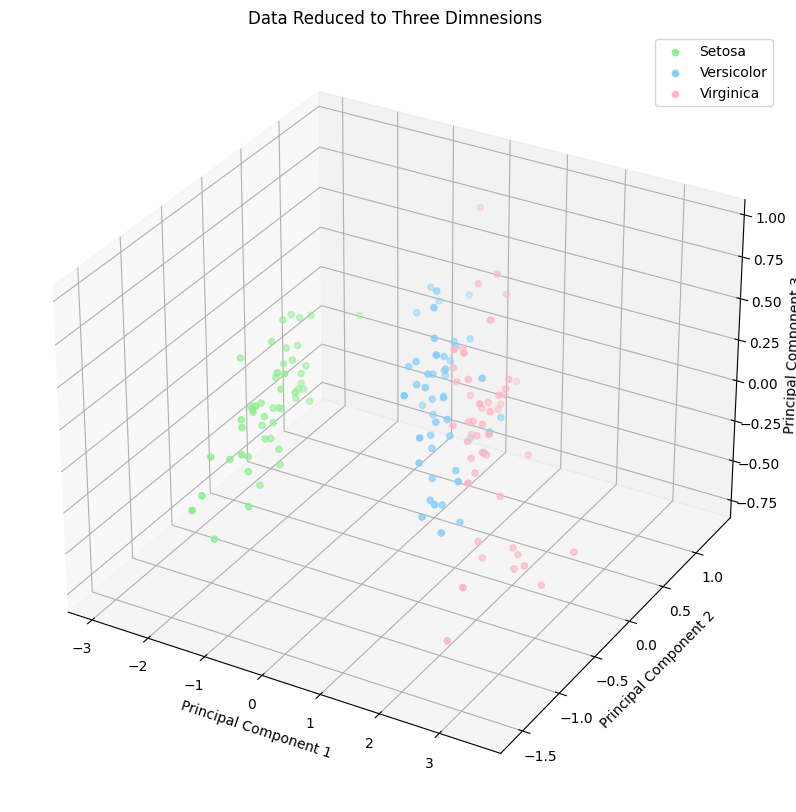

In [ ]:
df3 = df3 - df3.mean()
setosa = df3[:50]
versicolor = df3[51:100]
virginica = df3[101:150]
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d', facecolor = 'white')
ax.scatter(setosa['PC 1'], setosa['PC 2'], setosa['PC 3'], color = 'lightgreen')
ax.scatter(versicolor['PC 1'], versicolor['PC 2'], versicolor['PC 3'], color = 'lightskyblue')
ax.scatter(virginica['PC 1'], virginica['PC 2'], virginica['PC 3'], color = 'lightpink')
ax.set_title('Data Reduced to Three Dimnesions')
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.legend(['Setosa', 'Versicolor', 'Virginica'])
plt.show()